In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r"C:\Users\Hovarthanvishnu\Downloads\House_price_Prediction.csv.csv")
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
columns_to_remove = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
data = data.drop(columns=columns_to_remove)
data.head(10)


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
5,10850000,7500,3,3,1,2
6,10150000,8580,4,3,4,2
7,10150000,16200,5,3,2,0
8,9870000,8100,4,1,2,2
9,9800000,5750,3,2,4,1


In [6]:
print(data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [7]:
#Check for the any missing values in the dataset

In [8]:
print(data.isnull().sum())

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64


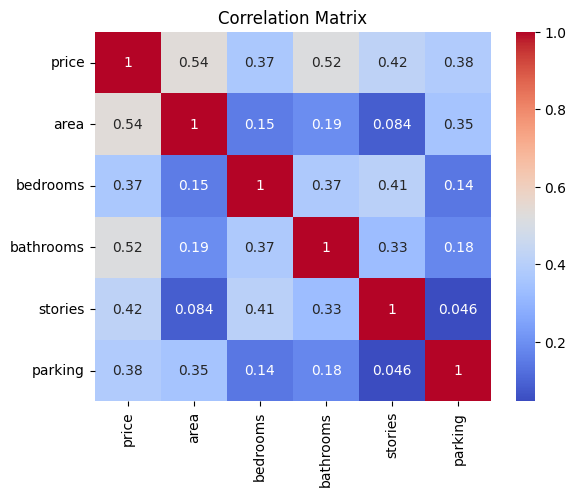

In [9]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']

In [19]:
#Training and Testing datasets using splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Building the Linear Regression Model and fitting the model on the training data

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2292721545725.3613
R-squared: 0.5464062355495873


In [27]:
#Predict and visualise the given dataset

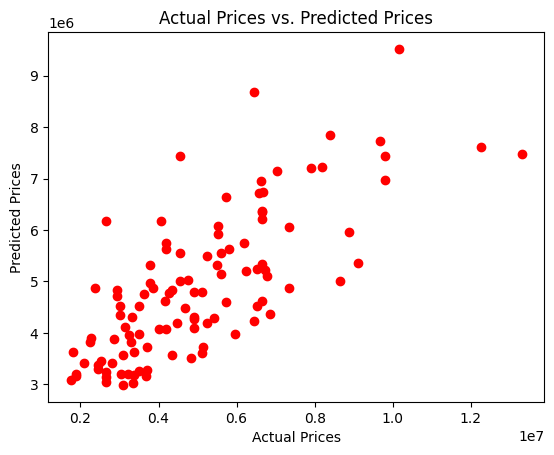

In [29]:
plt.scatter(y_test, y_pred,color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

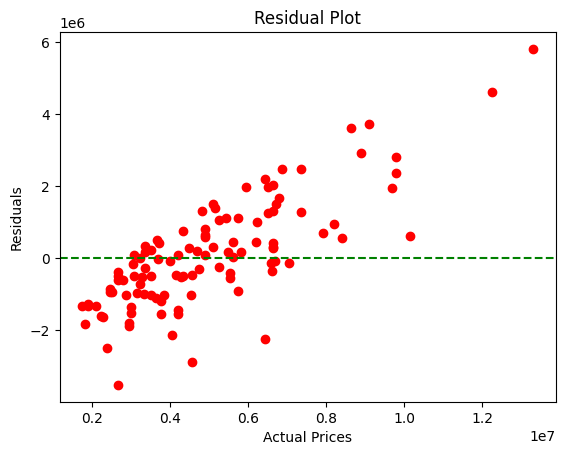

In [33]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals,color='red')
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Finally, From the above trained data model now we can predict the accurate predictions and visualise the result

In [50]:
new_data = [[6800, 3, 1, 4, 1]]
predicted_price = model.predict(new_data)
print("Predicted Housing Price:", predicted_price[0])

Predicted Housing Price: 6109830.824739848


In [ ]:
#Thus the predicted housing price using Linear Regression has been successfully displayed.